# Import code

In [110]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import math
import seaborn as sns
from chart_studio import plotly as py
import plotly.express as px


In [20]:
# 2019 broadband data file
broad_2019 = pd.read_csv("input/broadband_data_2019November.csv")
# Clean the data set by dropping rows with missing values
broad_2019[' BROADBAND USAGE '] = pd.to_numeric(broad_2019[' BROADBAND USAGE '], errors='coerce')
broad_2019[' BROADBAND AVAILABILITY PER FCC '] = pd.to_numeric(
    broad_2019[' BROADBAND AVAILABILITY PER FCC '], errors='coerce')
nan_value = float("NaN")
broad_2019.replace("-", nan_value, inplace = True)
broad_2019.dropna(subset = [' BROADBAND USAGE '], inplace = True)
broad_2019.dropna(subset = [' BROADBAND AVAILABILITY PER FCC '], inplace = True)
broad_2019 = broad_2019.sort_values(by = [' BROADBAND AVAILABILITY PER FCC '])

# 2020 broadband data file
broad_2020 = pd.read_csv("input/broadband_data_2020October.csv")
# Clean the data by dropping rows with missing values
broad_2020[' BROADBAND USAGE '] = pd.to_numeric(broad_2020[' BROADBAND USAGE '], errors='coerce')
broad_2020[' BROADBAND AVAILABILITY PER FCC '] = pd.to_numeric(
    broad_2020[' BROADBAND AVAILABILITY PER FCC '], errors='coerce')
broad_2020.replace("-", nan_value, inplace = True)
broad_2020.dropna(subset = [' BROADBAND USAGE '], inplace = True)
broad_2020.dropna(subset = [' BROADBAND AVAILABILITY PER FCC '], inplace = True)
broad_2020 = broad_2020.sort_values(by = [' BROADBAND AVAILABILITY PER FCC '])

# broadband challenge file
#broad_challenge = pd.read_csv("./input/broadband_data_opendatachallenge.csv")

# broadband by zip code
broad_zip = pd.read_csv("input/broadband_data_zipcode.csv")

In [101]:
broad_change = pd.merge(broad_2019, broad_2020, on=['COUNTY ID','COUNTY NAME','ST'], validate="one_to_one")
broad_change = broad_change.rename(columns={" BROADBAND AVAILABILITY PER FCC _x": "AVAILABILITY_2019", " BROADBAND USAGE _x": "USAGE_2019",
        " BROADBAND AVAILABILITY PER FCC _y": "AVAILABILITY_2020", " BROADBAND USAGE _y": "USAGE_2020"})

broad_change['AVAILABILITY_CHANGE'] = broad_change['AVAILABILITY_2020'] - broad_change['AVAILABILITY_2019']
broad_change['USAGE_CHANGE'] = broad_change['USAGE_2020'] - broad_change['USAGE_2019']

In [109]:
broad_change.sort_values('AVAILABILITY_CHANGE')
broad_change.to_csv('broadband_data_change.csv', index=False)

In [107]:
broad_change.sort_values('USAGE_CHANGE')

,ST,COUNTY ID,COUNTY NAME,AVAILABILITY_2019,USAGE_2019,AVAILABILITY_2020,USAGE_2020,AVAILABILITY_CHANGE,USAGE_CHANGE
1979,MA,25007,Dukes County,0.92,0.83,0.9275,0.568,0.0075,-0.262
1949,CO,8117,Summit County,0.91,0.92,0.8957,0.682,-0.0143,-0.238
562,ND,38007,Billings County,0.56,0.29,0.5366,0.091,-0.0234,-0.199
3023,NJ,34035,Somerset County,1.00,0.99,0.9927,0.831,-0.0073,-0.159
2097,GA,13281,Towns County,0.93,0.71,0.9779,0.569,0.0479,-0.141
...,...,...,...,...,...,...,...,...,...
1113,KS,20151,Pratt County,0.75,0.39,0.7943,0.884,0.0443,0.494
2539,VA,51570,Colonial Heights city,0.98,0.49,0.9872,1.000,0.0072,0.510
246,CO,8007,Archuleta County,0.35,0.17,0.8780,0.688,0.5280,0.518
1348,ID,16057,Latah County,0.80,0.23,0.8062,0.763,0.0062,0.533


/home/ishana_main/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AVAILABILITY_CHANGE', ylabel='USAGE_CHANGE'>

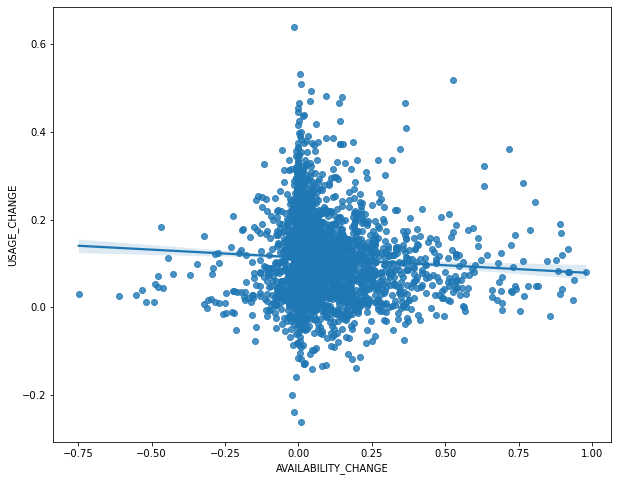

In [108]:
sns.regplot(broad_change['AVAILABILITY_CHANGE'],broad_change['USAGE_CHANGE'])

In [119]:
from urllib.request import urlopen
import json


In [121]:
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)


county_ids = broad_change['COUNTY ID'].tolist()
county_ids = [str(x) for x in county_ids]
#print(county_ids)

fig = px.choropleth(broad_change, geojson=counties, locations=county_ids, color='AVAILABILITY_CHANGE',
                           color_continuous_scale="Viridis",
                           range_color=(-1, 1),
                           scope="usa",
                           labels={'AVAILABILITY_CHANGE':'Availability Change'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

# Change in Broadband Availability from 2020 to 2019

In [ ]:
plt.rcParams['figure.figsize'] = [10, 8]
plt.xlabel('Broadband Availability')
plt.ylabel('Broadband Usability')
plt.title('2019 Broadband Availability vs Usability')
plt.scatter(broad_2019[' BROADBAND AVAILABILITY PER FCC '], broad_2019[' BROADBAND USAGE '], alpha = 0.5)

# 2019 broadband scatterplot

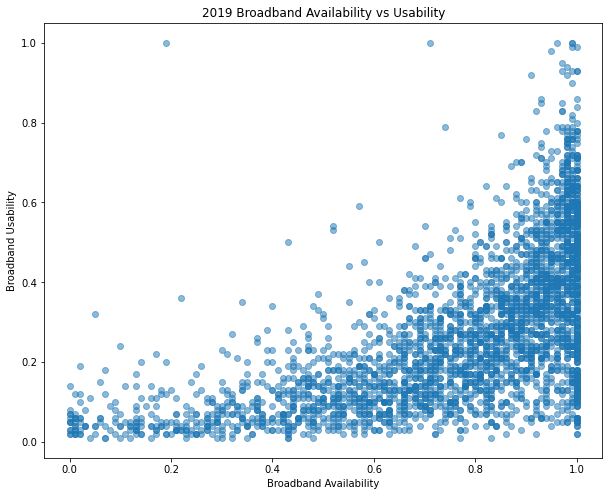

In [21]:
# TODO
plt.rcParams['figure.figsize'] = [10, 8]
plt.xlabel('Broadband Availability')
plt.ylabel('Broadband Usability')
plt.title('2019 Broadband Availability vs Usability')
plt.scatter(broad_2019[' BROADBAND AVAILABILITY PER FCC '], broad_2019[' BROADBAND USAGE '], alpha = 0.5)

# 2020 broadband scatterplot

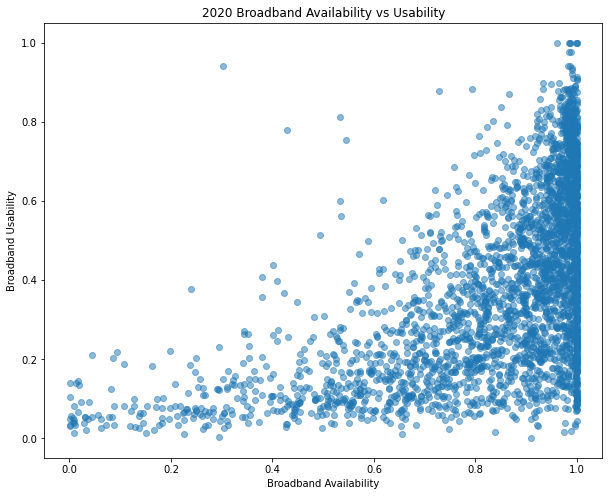

In [64]:
# TODO
plt.rcParams['figure.figsize'] = [10, 8]
plt.xlabel('Broadband Availability')
plt.ylabel('Broadband Usability')
plt.title('2020 Broadband Availability vs Usability')
plt.scatter(broad_2020[' BROADBAND AVAILABILITY PER FCC '], broad_2020[' BROADBAND USAGE '], alpha = 0.5)

# Plot Broadband Availability per FCC on x, Broadband Usage on y

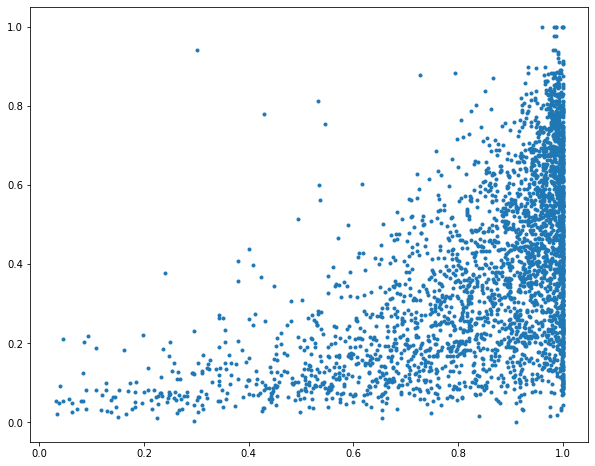

In [25]:
'''
Columns:
[:, 0] = State
[:, 1] = County ID
[:, 2] = County Name
[:, 3] = Broadband Availability per FCC
[:, 4] = Broadband Usage
'''

#Convent pandas dataframe to numpy array
brod_2020_array = broad_2020.to_numpy();

#Set up plot window
plt.rcParams['figure.figsize'] = [10,8]
#Plot Broadband Availability per FCC on x, Broadband Usage on y
plt.scatter(brod_2020_array[20:, 3], brod_2020_array[20:, 4], marker = '.')